# Previsão de renda

### 4 elementos importantes
- Esse notebook
- Streamlit com as análises
- Seu Github com o projeto
- Vídeo no readme do github mostrando o streamlit

## Etapa 1 CRISP - DM: Entendimento do negócio

<span style="color:red">Com base nos estudos e no Projeto 1, iremos aprofundar a análise neste Projeto 2. Utilizaremos o arquivo CSV "previsao_de_renda" para explorar os dados.
A partir das variáveis referentes aos últimos 15 meses, buscaremos compreender melhor a relação entre renda, datas e o sexo dos clientes que mais utilizam essas variáveis.
Isso nos permitirá identificar as preferências e prioridades de cada gênero em relação a diferentes aspectos de suas vidas.
Atividades do CRISP-DM:

*Objetivos do Negócio
O objetivo é reunir informações detalhadas de diversas variáveis para proporcionar um entendimento mais profundo sobre os clientes.

*Objetivos da Modelagem
Nosso objetivo é claro: desenvolver o melhor modelo preditivo possível para auxiliar o mutuário na tomada de decisões relacionadas ao crédito, proporcionando insights valiosos sobre o perfil financeiro dos clientes..</span>


## Etapa 2 Crisp-DM: Entendimento dos dados
<span style="color:red">Foram fornecidas 14 variáveis, além da variável resposta (em destaque na tabela). A seguir, apresentamos o significado de cada uma dessas variáveis.</span>


### Dicionário de dados

<span style="color:red">Os dados estão organizados em uma tabela onde cada linha representa um cliente, e cada coluna armazena as características associadas a esse cliente. Abaixo, incluímos uma cópia do dicionário de dados, que contém a explicação detalhada de cada uma dessas variáveis neste notebook:</span>


| Variável                | Descrição                                           | Tipo         |
| ----------------------- |:---------------------------------------------------:| ------------:|
| data_ref                |  Data de referência                                 | texto        |
| id_cliente              |  Código cliente                                     | inteiro      |
| sexo                    |  Sexo                                               | M/F          |
| posse_de_veiculo        |  Possui veículo                                     | Y/N          |
| posse_de_imovel         |  Possui imóvel                                      | Y/N          |
| qtd_filhos              |  Quantidade de filhos                               | inteiro      |
| tipo_renda              |  Tipo de renda                                      | texto        |
| educacao                |  Escolaridade                                       | texto        |
| estado_civil            |  Estado civil                                       | texto        |
| tipo_residencia         |  Tipo de residência                                 | texto        |
| idade                   |  Idade                                              | inteiro      |
| tempo_emprego           |  Tempo no emprego                                   | float        |
| qt_pessoas_residencia   |  Quantidade de pessoas na residência                | float        |
| renda                   |  Renda                                              | float        ||





#### Carregando os pacotes
É considerado uma boa prática carregar os pacotes que serão utilizados como a primeira coisa do programa.

In [6]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import tree

%matplotlib inline

#### Carregando os dados
O comando pd.read_csv é um comando da biblioteca pandas (pd.) e carrega os dados do arquivo csv indicado para um objeto *dataframe* do pandas.

In [8]:
renda = pd.read_csv('previsao_de_renda.csv')

In [9]:
renda.head(1)

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.60274,1.0,8060.34


In [10]:
renda = pd.read_csv('previsao_de_renda.csv')
renda.drop(['Unnamed: 0'], axis=1)

,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2016-03-01,16006,F,False,True,0,Empresário,Secundário,Solteiro,Casa,48,13.887671,1.0,7990.58
14996,2016-03-01,3722,F,False,True,0,Pensionista,Superior completo,Solteiro,Casa,57,NaN,1.0,10093.45
14997,2016-03-01,6194,F,True,True,0,Assalariado,Superior completo,Casado,Casa,45,7.832877,2.0,604.82
14998,2016-03-01,4922,M,True,False,0,Empresário,Superior completo,Casado,Casa,36,4.298630,2.0,3352.27


In [11]:
renda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   id_cliente             15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12427 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  renda                  15000 non-null  float64
dtypes:

#### Entendimento dos dados - Univariada
Nesta etapa tipicamente avaliamos a distribuição de todas as variáveis. 

In [13]:
prof = ProfileReport(renda, explorative=True, minimal=True)
prof


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [14]:
prof.to_file('./output/renda_analisys.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

FileNotFoundError: [Errno 2] No such file or directory: 'output\\renda_analisys.html'

<span style="color:red">ESCREVER AQUI</span>


### Entendimento dos dados - Bivariadas




<span style="color:red">ESCREVER AQUI</span>


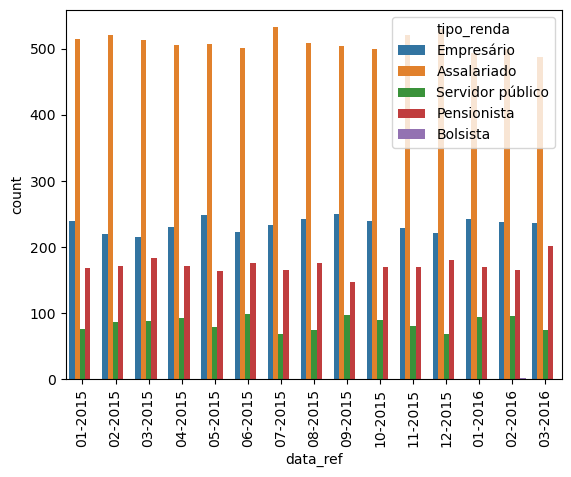

In [26]:

# Converta 'data_ref' para datetime
renda['data_ref'] = pd.to_datetime(renda['data_ref'])

# Crie o gráfico
ax = sns.countplot(
    data=renda,
    x='data_ref',
    hue='tipo_renda'
)

# Formate os rótulos dos ticks do eixo x
tick_labs = renda['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

# Configure os ticks e os rótulos
ticks = ax.set_xticks(list(range(renda['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)

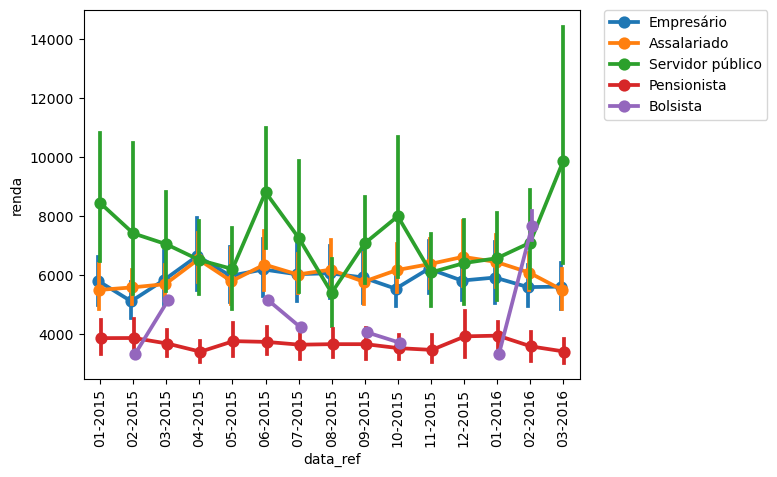

In [28]:
ax = sns.pointplot(
    data=renda,
    x='data_ref',
    y='renda',
    hue='tipo_renda',
    dodge=True,
    errorbar=('ci', 95)
)

plt.legend(loc='lower center', bbox_to_anchor=(0.5, -.100), ncol=3)
tick_labs = renda['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()
ticks = ax.set_xticks(list(range(renda['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

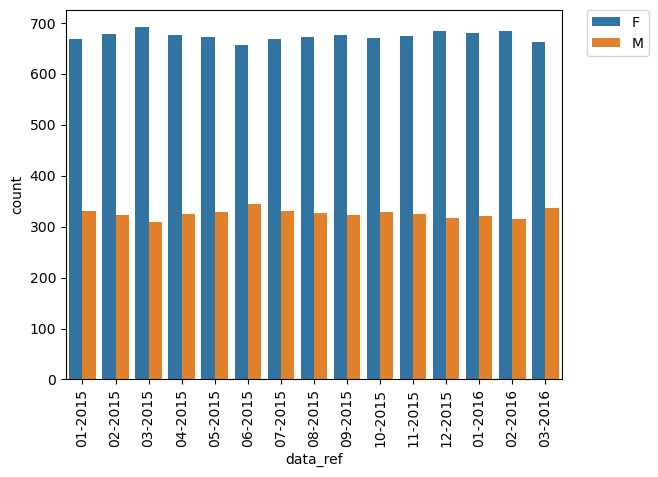

In [29]:

# sexo que mais utiliza o serviço 
ax = sns.countplot(
    data=renda,
    x='data_ref',
    hue='sexo'
)

tick_labs = renda['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(renda['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

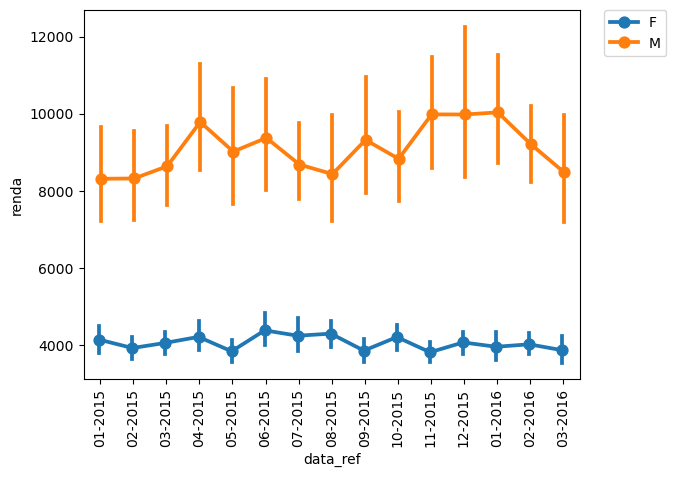

In [30]:
# quem recebe mais
ax = sns.pointplot(
    data=renda,
    x='data_ref',
    y='renda',
    hue='sexo',
    dodge=True,
    errorbar=('ci', 95)
)

plt.legend(loc='lower center', bbox_to_anchor=(0.5, -.100), ncol=3)
tick_labs = renda['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()
ticks = ax.set_xticks(list(range(renda['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


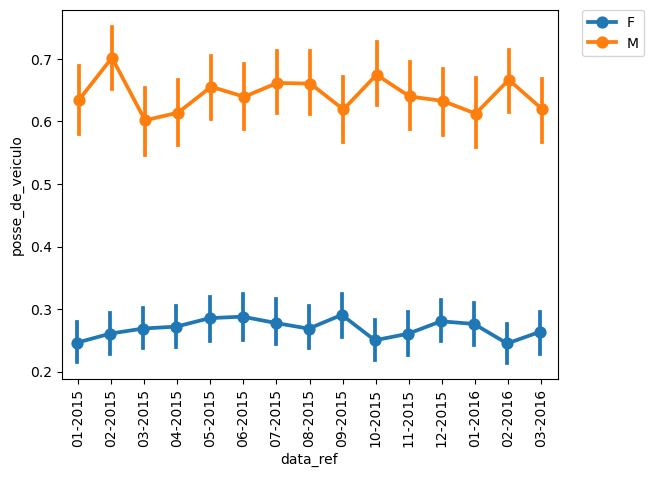

In [31]:

# posse veiculo por sexo
ax = sns.pointplot(
    data=renda,
    x='data_ref',
    y='posse_de_veiculo',
    hue='sexo',
    dodge=True,
)

plt.legend(loc='lower center', bbox_to_anchor=(0.3, -.100), ncol=3)
tick_labs = renda['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()
ticks = ax.set_xticks(list(range(renda['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

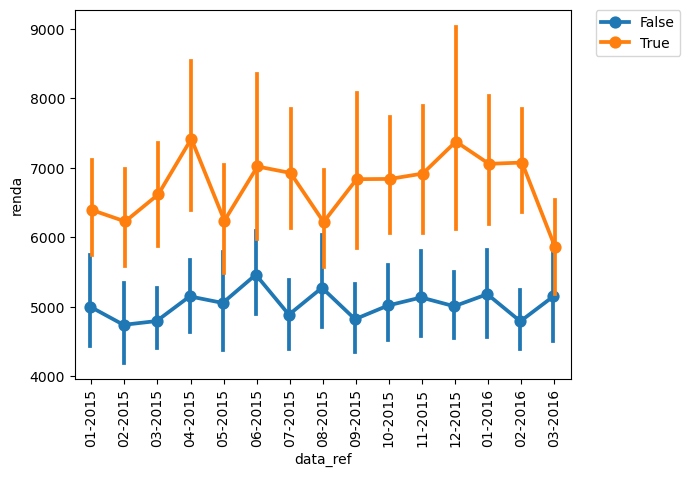

In [33]:

ax = sns.pointplot(
    data=renda,
    x='data_ref',
    y='renda',
    hue='posse_de_veiculo',
    dodge=True,
    errorbar=('ci', 95)
)

plt.legend(loc='lower center', bbox_to_anchor=(0.5, -.100), ncol=3)
tick_labs = renda['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()
ticks = ax.set_xticks(list(range(renda['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

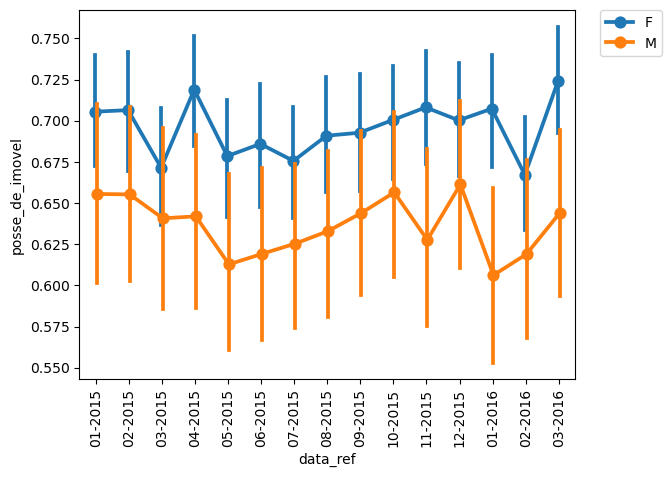

In [35]:
# posse de imovel por sexo
ax = sns.pointplot(
    data=renda,
    x='data_ref',
    y='posse_de_imovel',
    hue='sexo',
    dodge=True,
)

plt.legend(loc='lower center', bbox_to_anchor=(0.3, -.100), ncol=3)
tick_labs = renda['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()
ticks = ax.set_xticks(list(range(renda['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

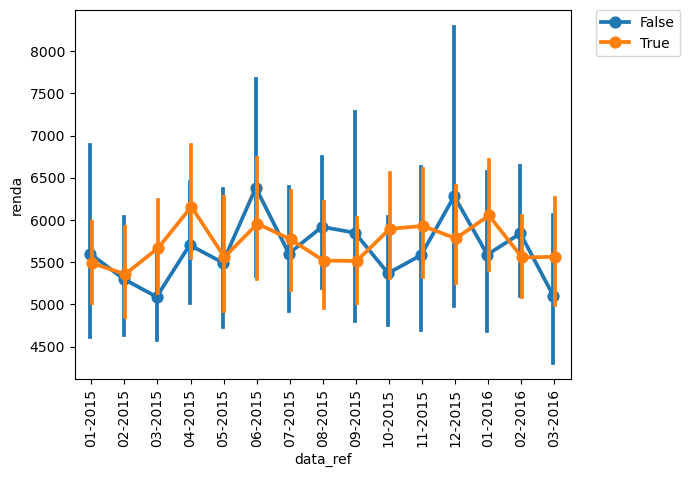

In [36]:

ax = sns.pointplot(
    data=renda,
    x='data_ref',
    y='renda',
    hue='posse_de_imovel',
    dodge=True,
    errorbar=('ci', 95)
)

plt.legend(loc='lower center', bbox_to_anchor=(0.5, -.100), ncol=3)
tick_labs = renda['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()
ticks = ax.set_xticks(list(range(renda['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

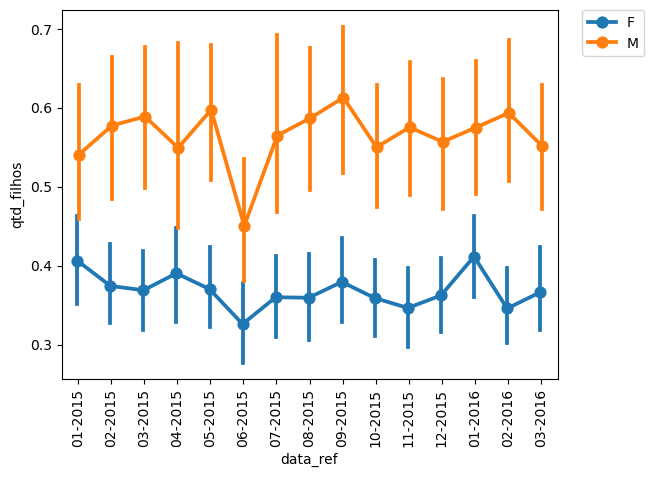

In [37]:
# quantidade de filho por sexo
ax = sns.pointplot(
    data=renda,
    x='data_ref',
    y='qtd_filhos',
    hue='sexo',
    dodge=True,
)

plt.legend(loc='lower center', bbox_to_anchor=(0.3, -.100), ncol=3)
tick_labs = renda['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()
ticks = ax.set_xticks(list(range(renda['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

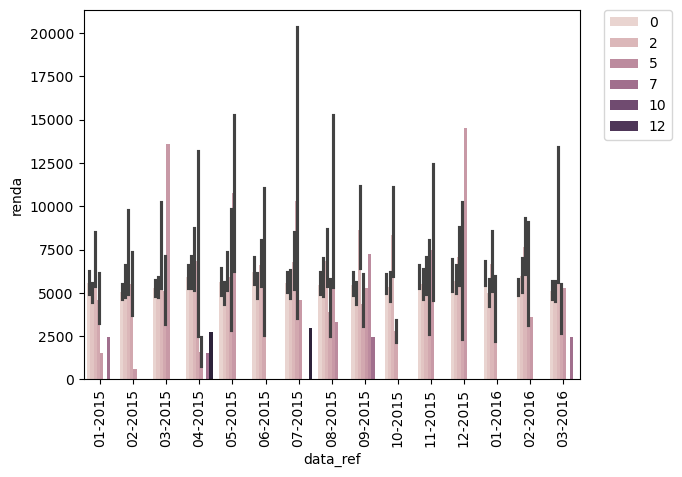

In [39]:
ax = sns.barplot(
    data=renda,
    x='data_ref',
    y='renda',
    hue='qtd_filhos',
    dodge=True,
    errorbar=('ci', 95)
)

plt.legend(loc='lower center', bbox_to_anchor=(0.5, -.100), ncol=3)
tick_labs = renda['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()
ticks = ax.set_xticks(list(range(renda['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

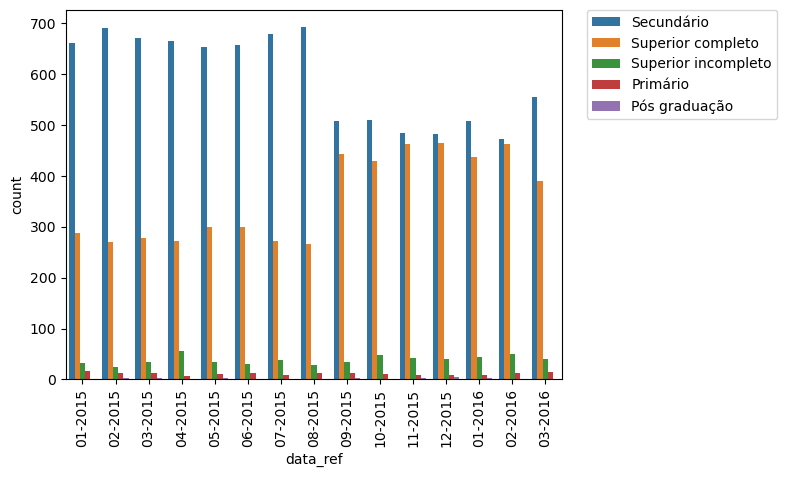

In [40]:

# educação
ax = sns.countplot(
    data=renda,
    x='data_ref',
    hue='educacao'
)

tick_labs = renda['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(renda['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

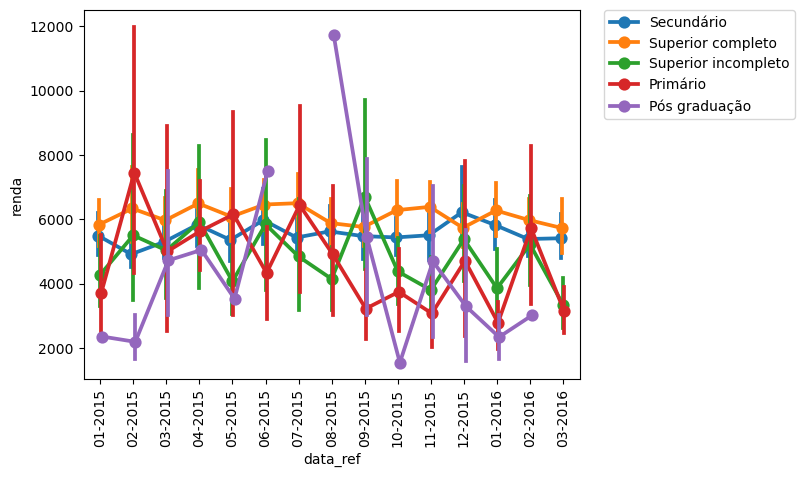

In [41]:

ax = sns.pointplot(
    data=renda,
    x='data_ref',
    y='renda',
    hue='educacao',
    dodge=True,
    errorbar=('ci', 95)
)

plt.legend(loc='lower center', bbox_to_anchor=(0.5, -.100), ncol=3)
tick_labs = renda['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()
ticks = ax.set_xticks(list(range(renda['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

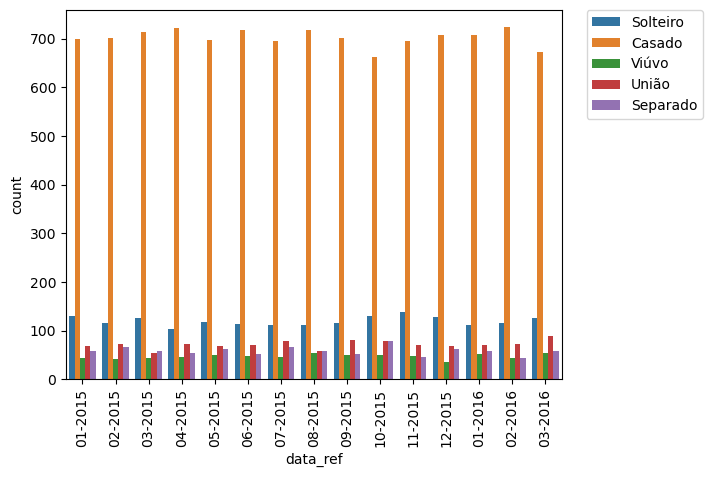

In [42]:

# estado civil
ax = sns.countplot(
    data=renda,
    x='data_ref',
    hue='estado_civil'
)

tick_labs = renda['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(renda['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

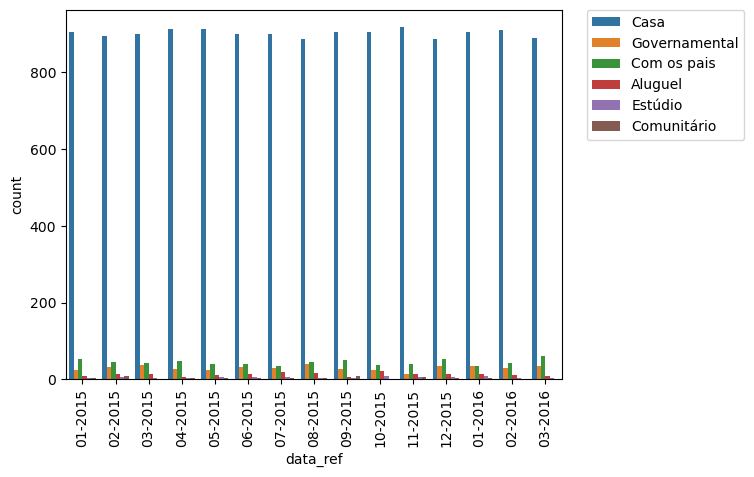

In [44]:
# tipo_residencia
ax = sns.countplot(
    data=renda,
    x='data_ref',
    hue='tipo_residencia'
)

tick_labs = renda['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(renda['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


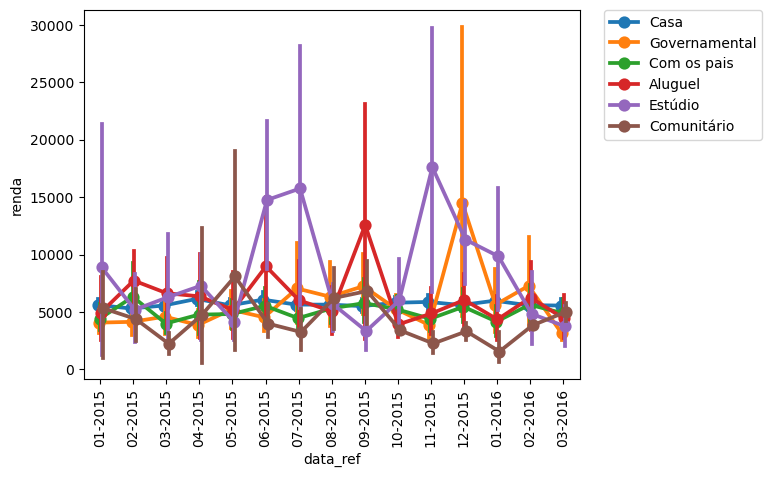

In [45]:

ax = sns.pointplot(
    data=renda,
    x='data_ref',
    y='renda',
    hue='tipo_residencia',
    dodge=True,
    errorbar=('ci', 95)
)

plt.legend(loc='lower center', bbox_to_anchor=(0.5, -.100), ncol=3)
tick_labs = renda['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()
ticks = ax.set_xticks(list(range(renda['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

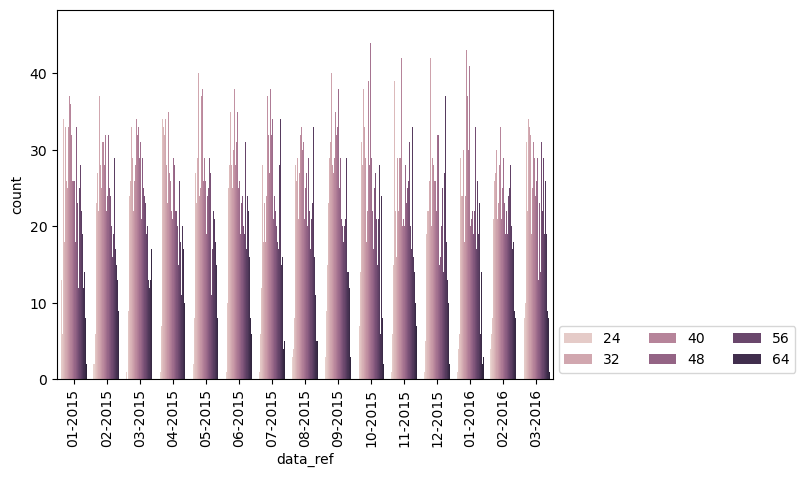

In [47]:
# idade
ax = sns.countplot(
    data=renda,
    x='data_ref',
    hue='idade'
)

tick_labs = renda['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(renda['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)
plt.legend(loc='lower center', bbox_to_anchor=(1.25, -.0), ncol=3)

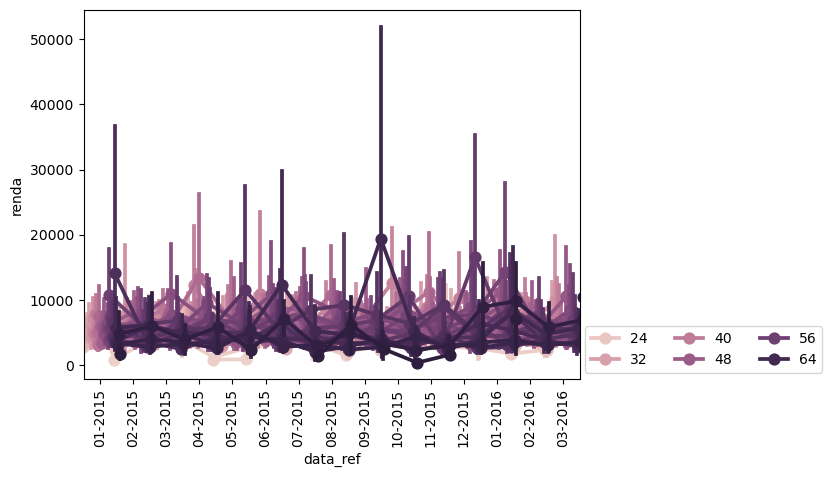

In [48]:
ax = sns.pointplot(
    data=renda,
    x='data_ref',
    y='renda',
    hue='idade',
    dodge=True,
    errorbar=('ci', 95)
)

plt.legend(loc='lower center', bbox_to_anchor=(0.5, -.100), ncol=3)
tick_labs = renda['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()
ticks = ax.set_xticks(list(range(renda['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)
plt.legend(loc='lower center', bbox_to_anchor=(1.25, -.0), ncol=3)

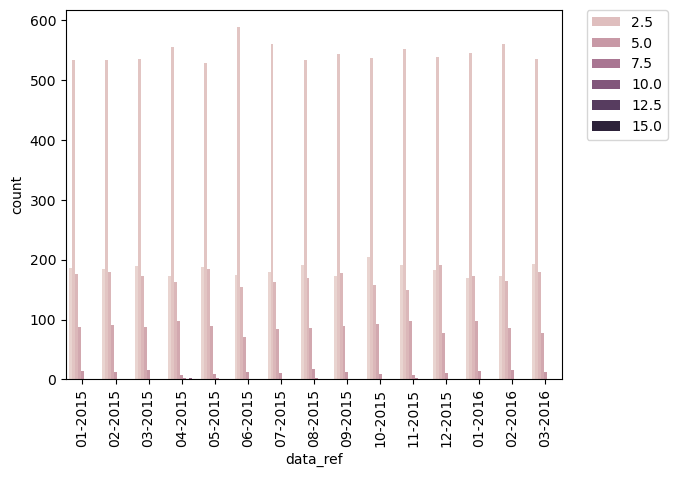

In [49]:
# qt_pessoas_residencia
ax = sns.countplot(
    data=renda,
    x='data_ref',
    hue='qt_pessoas_residencia'
)

tick_labs = renda['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(renda['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

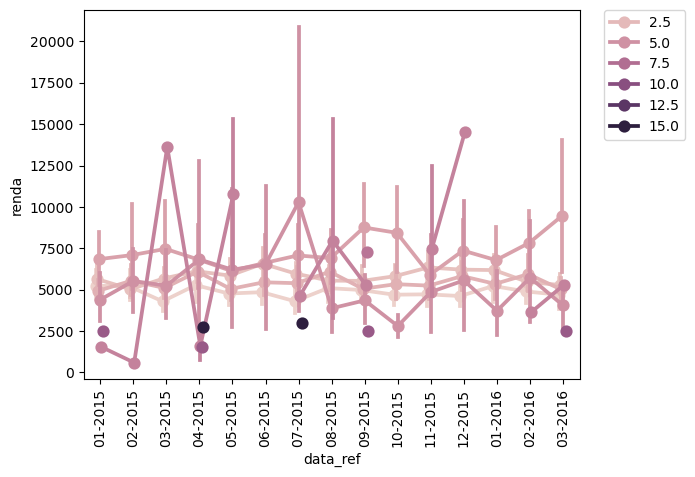

In [50]:
ax = sns.pointplot(
    data=renda,
    x='data_ref',
    y='renda',
    hue='qt_pessoas_residencia',
    dodge=True,
    errorbar=('ci', 95)
)

plt.legend(loc='lower center', bbox_to_anchor=(0.5, -.100), ncol=3)
tick_labs = renda['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()
ticks = ax.set_xticks(list(range(renda['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:

 - **seleção**: Já temos os dados selecionados adequadamente?
 - **limpeza**: Precisaremos identificar e tratar dados faltantes
 - **construção**: construção de novas variáveis
 - **integração**: Temos apenas uma fonte de dados, não é necessário integração
 - **formatação**: Os dados já se encontram em formatos úteis?



<span style="color:red">ESCREVER AQUI</span>


In [55]:
# 1. Seleção: removendo colunas desnecessárias
renda = renda.drop(['Unnamed: 0', 'data_ref', 'id_cliente', 'tempo_emprego'], axis=1)


In [56]:
# 2. Limpeza
# Verificando dados faltantes
print("Dados faltantes:")
print(renda.isnull().sum())

Dados faltantes:
sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
qt_pessoas_residencia    0
renda                    0
dtype: int64


In [57]:
# Se não houver dados faltantes, podemos prosseguir para a remoção de duplicatas
# Tirando duplicados
renda = renda.drop_duplicates()
renda = renda.reset_index(drop=True)

In [59]:
# Exibindo as informações do DataFrame
print("\nApós limpeza:")
print(renda.shape)
print(renda.info())


Após limpeza:
(10447, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10447 entries, 0 to 10446
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   10447 non-null  object 
 1   posse_de_veiculo       10447 non-null  bool   
 2   posse_de_imovel        10447 non-null  bool   
 3   qtd_filhos             10447 non-null  int64  
 4   tipo_renda             10447 non-null  object 
 5   educacao               10447 non-null  object 
 6   estado_civil           10447 non-null  object 
 7   tipo_residencia        10447 non-null  object 
 8   idade                  10447 non-null  int64  
 9   qt_pessoas_residencia  10447 non-null  float64
 10  renda                  10447 non-null  float64
dtypes: bool(2), float64(2), int64(2), object(5)
memory usage: 755.1+ KB
None


In [60]:
# 3. Construção: criando novas variáveis
# Exemplo: criar uma variável que classifica a renda em faixas
def classifica_renda(renda):
    if renda < 1000:
        return 'Baixa'
    elif 1000 <= renda < 3000:
        return 'Média'
    else:
        return 'Alta'

In [61]:
# Criando um novo DataFrame apenas com as colunas de interesse
nova_variavel = renda[['renda']].copy()
nova_variavel['classificacao_renda'] = nova_variavel['renda'].apply(classifica_renda)

# 4. Exibindo o novo DataFrame
print("\nNovo DataFrame com classificação de renda:")
print(nova_variavel.head())

# 5. (Opcional) Verificando a distribuição da nova variável
print("\nDistribuição da classificação de renda:")
print(nova_variavel['classificacao_renda'].value_counts())


Novo DataFrame com classificação de renda:
     renda classificacao_renda
0  8060.34                Alta
1  1852.15               Média
2  2253.89               Média
3  6600.77                Alta
4  6475.97                Alta

Distribuição da classificação de renda:
classificacao_renda
Alta     5960
Média    3875
Baixa     612
Name: count, dtype: int64


## Etapa 4 Crisp-DM: Modelagem
Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:
- Selecionar a técnica de modelagem
- Desenho do teste
- Avaliação do modelo


<span style="color:red">ESCREVER AQUI</span>


### Rodando o modelo


<span style="color:red">ESCREVER AQUI</span>


In [68]:

renda = pd.get_dummies(renda, columns=['sexo', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia'], drop_first=True).copy()
renda.dtypes

posse_de_veiculo                    bool
posse_de_imovel                     bool
qtd_filhos                         int64
idade                              int64
qt_pessoas_residencia            float64
renda                            float64
sexo_M                              bool
tipo_renda_Bolsista                 bool
tipo_renda_Empresário               bool
tipo_renda_Pensionista              bool
tipo_renda_Servidor público         bool
educacao_Pós graduação              bool
educacao_Secundário                 bool
educacao_Superior completo          bool
educacao_Superior incompleto        bool
estado_civil_Separado               bool
estado_civil_Solteiro               bool
estado_civil_União                  bool
estado_civil_Viúvo                  bool
tipo_residencia_Casa                bool
tipo_residencia_Com os pais         bool
tipo_residencia_Comunitário         bool
tipo_residencia_Estúdio             bool
tipo_residencia_Governamental       bool
dtype: object

In [69]:

X = renda.drop(['renda'], axis=1).copy()
y = renda['renda']
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10447 entries, 0 to 10446
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   posse_de_veiculo               10447 non-null  bool   
 1   posse_de_imovel                10447 non-null  bool   
 2   qtd_filhos                     10447 non-null  int64  
 3   idade                          10447 non-null  int64  
 4   qt_pessoas_residencia          10447 non-null  float64
 5   sexo_M                         10447 non-null  bool   
 6   tipo_renda_Bolsista            10447 non-null  bool   
 7   tipo_renda_Empresário          10447 non-null  bool   
 8   tipo_renda_Pensionista         10447 non-null  bool   
 9   tipo_renda_Servidor público    10447 non-null  bool   
 10  educacao_Pós graduação         10447 non-null  bool   
 11  educacao_Secundário            10447 non-null  bool   
 12  educacao_Superior completo     10447 non-null 

In [70]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 10447 entries, 0 to 10446
Series name: renda
Non-Null Count  Dtype  
--------------  -----  
10447 non-null  float64
dtypes: float64(1)
memory usage: 81.7 KB


In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2360873)

In [72]:
reg1 = DecisionTreeRegressor(max_depth=2)
reg2 = DecisionTreeRegressor(max_depth=8)

reg1.fit(X_test, y_test)
reg2.fit(X_test, y_test)

DecisionTreeRegressor(max_depth=8)

In [74]:

mse1 = reg1.score(X_test, y_test)
mse2 = reg2.score(X_test, y_test)

template = "O R-quadrado da árvore com profundidade {0} é: {1:.2f}"

print(template.format(reg1.get_depth(), mse1).replace(".", ","))
print(template.format(reg2.get_depth(), mse2).replace(".", ","))

O R-quadrado da árvore com profundidade 2 é: 0,11
O R-quadrado da árvore com profundidade 8 é: 0,39


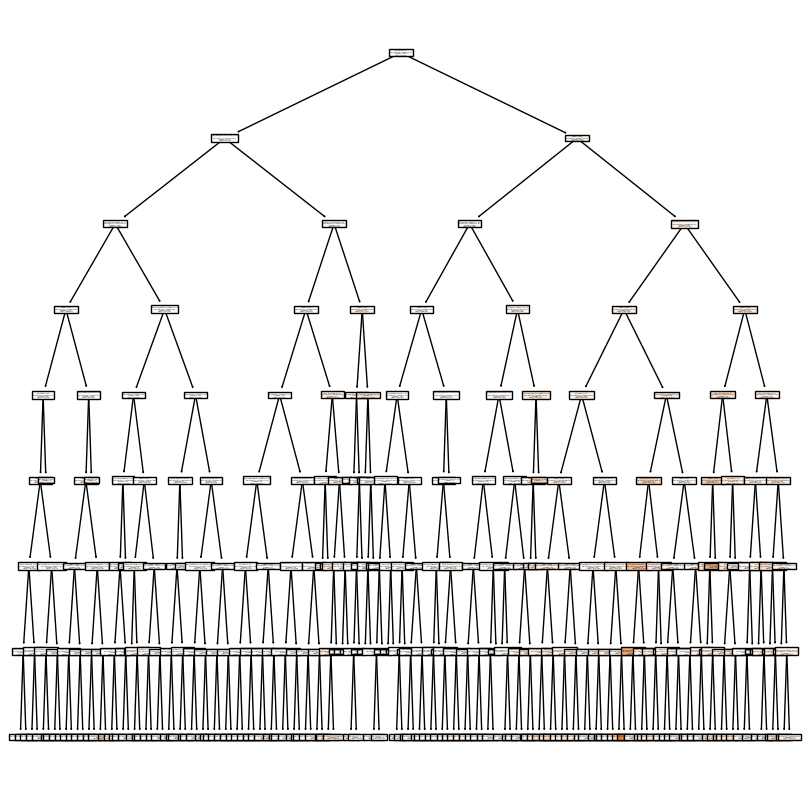

In [76]:

plt.rc('figure', figsize=(10, 10))
tp = tree.plot_tree(reg2,
                    feature_names=X_test.columns,
                    filled=True)

In [77]:
# Pré poda da melhor árvore

reg2 = DecisionTreeRegressor(max_depth=8, min_samples_leaf=20)
reg2.fit(X_train, y_train)
mse1 = reg2.score(X_test, y_test)
mse1

0.08754518559720537

n_minimo,1,2,3,4,5,6,7,8
profundidade,,,,,,,,
1,0.082241,0.082241,0.082241,0.082241,0.082241,0.082241,0.082241,0.082241
2,0.091825,0.091825,0.091825,0.091825,0.091825,0.091825,0.091825,0.091825
3,0.106674,0.106674,0.106674,0.106674,0.113832,0.113832,0.113832,0.113832
4,0.120418,0.120418,0.120418,0.120418,0.107872,0.107928,0.107928,0.107928
5,0.113600,0.113599,0.113585,0.113461,0.123792,0.111297,0.111297,0.111291
6,0.111960,0.111925,0.112676,0.112690,0.110574,0.097204,0.097010,0.112808
7,0.060287,0.081826,0.112473,0.117102,0.123714,0.113404,0.099325,0.119865
8,0.054686,0.076174,0.108348,0.113623,0.152601,0.141125,0.125612,0.122908


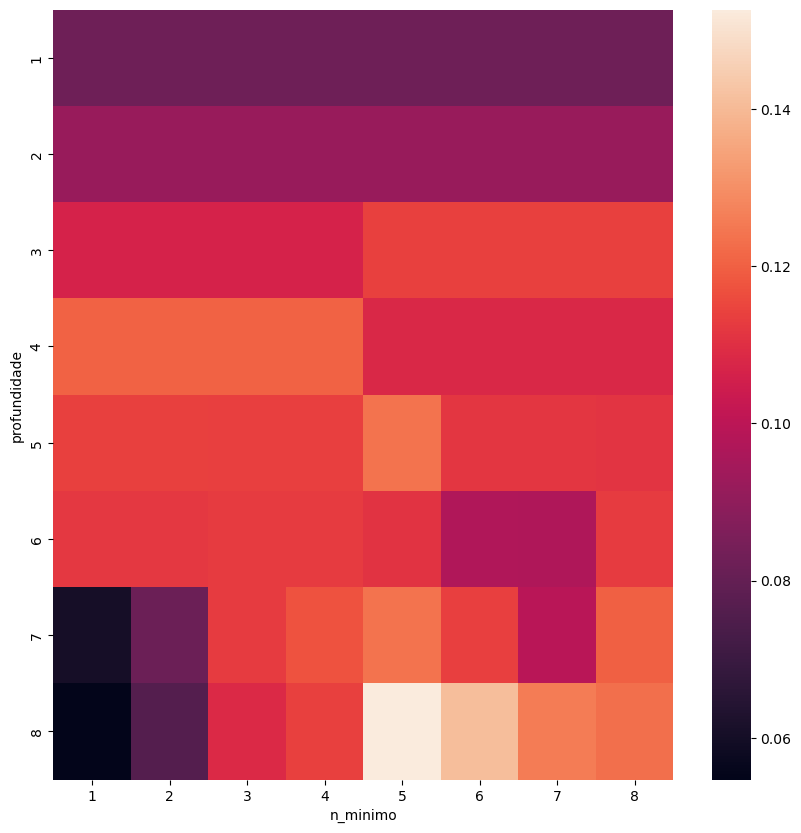

In [78]:
mses = []
ind_i = []
ind_j = []

for i in range(1, 9):
    for j in range(1, 9):
        reg2 = DecisionTreeRegressor(max_depth=i, min_samples_leaf=j)
        reg2.fit(X_train, y_train)
        mse1 = reg2.score(X_test, y_test)
        mses.append(mse1)
        ind_i.append(i)
        ind_j.append(j)

df_mse = pd.DataFrame({'mses': mses, 'profundidade': ind_i, 'n_minimo': ind_j})
sns.heatmap(df_mse.pivot(index='profundidade',
            columns='n_minimo', values='mses'))
df_mse.pivot(index='profundidade', columns='n_minimo', values='mses')

## Etapa 5 Crisp-DM: Avaliação dos resultados


<span style="color:red">ESCREVER AQUI</span>


In [82]:
# Calcula os R² de treino e teste
r2_train = reg2.score(X_train, y_train) * 100
r2_test = reg2.score(X_test, y_test) * 100

# Exibe os resultados formatados
print(f"R² de treino: {r2_train:.2f}%")
print(f"R² de teste: {r2_test:.2f}%")

R² de treino: 22.52%
R² de teste: 12.29%


## Etapa 6 Crisp-DM: Implantação
Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando o modelo desenvolvido em um motor que toma as decisões com algum nível de automação.